In [47]:
import xgboost as xgb
from sklearn.linear_model import Lasso
import pandas as pd


def targetdf_struct(df,featurenames,ipiNames):
    ipi=[0,1/6,2/6,3/6,4/6,5/6,1]
    targetDf=pd.DataFrame(columns=featurenames+['IPI'])
    # print(1)
    for index,row1 in df.iterrows():
        for index,ipiname in enumerate(ipiNames):
            row=row1.copy()
            row['IPI']=row[ipiname]
            if(pd.isna(row['IPI'])):continue
            row['时间点']=ipi[index]
            row=row[row.index.isin(featurenames+['IPI'])]
            # print(row)
            df_row=row.to_frame()
            row2 = pd.DataFrame(df_row.values.T,columns=df_row.index)
            # print(row2)
            targetDf=pd.concat([targetDf,row2],axis=0,ignore_index=True)

            # print(targetDf)
    return targetDf

if __name__=='__main__':
# 使用lasso提取关键特征
    raw_dfAll= pd.read_excel('./data/整体excel.xlsx')
    raw_dfR=pd.read_excel("group_R药.xlsx")
    raw_dfB=pd.read_excel("group_B药.xlsx")
    featureNames=["体重",	"年龄",	"性别",	"是否吸烟",	"是否酗酒","有无PONV","有无手术史",	"有无既往史",	"有无晕动史","身高","镇痛药用药量","镇静药名称","镇静药用药量","时间点"]
    # featureNames=["体重",	"年龄",	"性别",	"是否吸烟",	"是否酗酒","有无PONV","有无手术史",	"有无既往史",	"有无晕动史","身高","镇痛药用药量","镇静药用药量","时间点"]

    ipiNames=['IPI00','IPI005','IPI1','IPI015','IPI2','IPI025','IPI3']
    targetDf=targetdf_struct(raw_dfAll,featureNames,ipiNames)
    print(targetDf)


            体重    年龄 性别 是否吸烟 是否酗酒 有无PONV 有无手术史 有无既往史 有无晕动史    身高    镇痛药用药量  \
0     0.416667  0.72  0    0    0      0     0     0     0  0.79       7.0   
1     0.416667  0.72  0    0    0      0     0     0     0  0.79       7.0   
2     0.416667  0.72  0    0    0      0     0     0     0  0.79       7.0   
3     0.416667  0.72  0    0    0      0     0     0     0  0.79       7.0   
4     0.416667  0.72  0    0    0      0     0     0     0  0.79       7.0   
...        ...   ... ..  ...  ...    ...   ...   ...   ...   ...       ...   
8418  0.458333  0.61  0    0    0      0     0     0     0  0.75  9.090909   
8419  0.458333  0.61  0    0    0      0     0     0     0  0.75  9.090909   
8420  0.458333  0.61  0    0    0      0     0     0     0  0.75  9.090909   
8421  0.458333  0.61  0    0    0      0     0     0     0  0.75  9.090909   
8422  0.458333  0.61  0    0    0      0     0     0     0  0.75  9.090909   

     镇静药名称    镇静药用药量       时间点   IPI  
0       B药       1.5    

In [48]:
print(targetDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8423 entries, 0 to 8422
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   体重      8423 non-null   object
 1   年龄      8416 non-null   object
 2   性别      8423 non-null   object
 3   是否吸烟    8423 non-null   object
 4   是否酗酒    8423 non-null   object
 5   有无PONV  8423 non-null   object
 6   有无手术史   8423 non-null   object
 7   有无既往史   8423 non-null   object
 8   有无晕动史   8423 non-null   object
 9   身高      8423 non-null   object
 10  镇痛药用药量  8423 non-null   object
 11  镇静药名称   8423 non-null   object
 12  镇静药用药量  8423 non-null   object
 13  时间点     8423 non-null   object
 14  IPI     8423 non-null   object
dtypes: object(15)
memory usage: 987.2+ KB
None


[11:06:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "average" } are not used.

[0]	train-merror:0.33793
[1]	train-merror:0.32858
[2]	train-merror:0.33007
[3]	train-merror:0.33022
[4]	train-merror:0.32799
[5]	train-merror:0.32844
[6]	train-merror:0.32858
[7]	train-merror:0.32695
[8]	train-merror:0.32873
[9]	train-merror:0.32799
[10]	train-merror:0.32784
[11]	train-merror:0.32769
[12]	train-merror:0.32784
[13]	train-merror:0.32755
[14]	train-merror:0.32799
[15]	train-merror:0.32799
[16]	train-merror:0.32829
[17]	train-merror:0.32755
[18]	train-merror:0.32784
[19]	train-merror:0.32740
[20]	train-merror:0.32755
[21]	train-merror:0.32769
[22]	train-merror:0.32755
[23]	train-merror:0.32755
[24]	train-merror:0.32755
[25]	train-merror:0.32740
[26]	train-merror:0.32710
[27]	train-merror:0.32695
[28]	train-merror:0.32695
[29]	train-merror:0.32769
[30]	train-merror:0.32725
[31]	tr

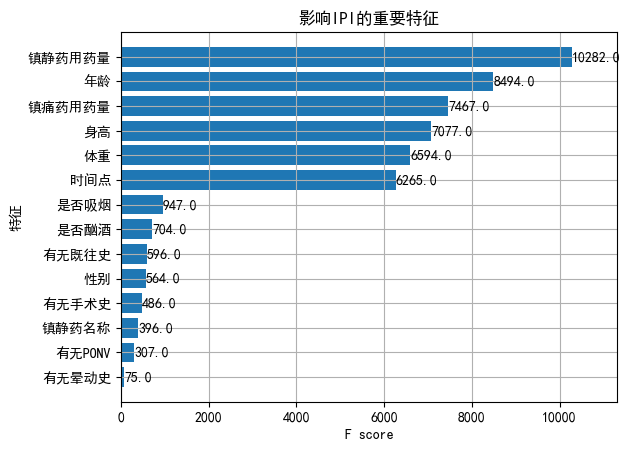

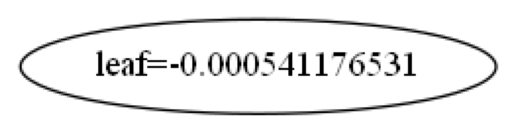

In [52]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

category_columns=["是否酗酒","有无PONV","有无手术史",'是否吸烟',"有无既往史",	"是否酗酒","有无PONV","有无手术史",	"有无既往史",	"有无晕动史","有无晕动史","镇静药名称",'IPI','性别']
float_columns=["体重",	"年龄","身高","镇痛药用药量","镇静药用药量","时间点"]

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# targetDf=targetDf.astype(float)
for k in category_columns:
    targetDf[k]=targetDf[k].astype('category')
for i in float_columns:
    targetDf[i]=targetDf[i].astype("float")
target=targetDf['IPI']
tags=targetDf[featureNames]
train_x, test_x, train_y, test_y = train_test_split(tags,target,test_size=0.2,random_state=7)



dtrain=xgb.DMatrix(train_x,label=train_y,enable_categorical=True)
dtest=xgb.DMatrix(test_x,enable_categorical=True)
watchlist = [(dtrain,'train')]


# xgboost初始化设置
params={'booster':'gbtree',
        'objective': 'multi:softmax',
        'eval_metric': 'merror',
        'max_depth':5,
        'lambda':10,
        'subsample':0.75,
        'colsample_bytree':0.75,
        'min_child_weight':2,
        'eta': 0.025,
        'seed':0,
        'nthread':8,
        'gamma':0.15,
        'learning_rate' : 0.001,
        'average':'micro',
        'num_class':11}

bst=xgb.train(params,dtrain,num_boost_round=500,evals=watchlist)
ypred=bst.predict(dtest)

# 设置阈值、评价指标
print(ypred[1])
# print(type(ypred))
y_pred = ypred
# print(y_pred)
print ('Precesion: %.4f' %metrics.precision_score(test_y,y_pred,average='micro'))
print ('Recall: %.4f' % metrics.recall_score(test_y,y_pred,average='micro'))
# print ('F1-score: %.4f' %metrics.f1_score(test_y,y_pred,average='micro'))
print ('F1-score: %.4f' %metrics.f1_score(test_y,y_pred,average='micro'))
print ('Accuracy: %.4f' % metrics.accuracy_score(test_y,y_pred))
# print ('AUC: %.4f' % metrics.roc_auc_score(test_y,ypred))

ypred = bst.predict(dtest)
# print("测试集每个样本的得分\n",ypred)
ypred_leaf = bst.predict(dtest, pred_leaf=True)
# print("测试集每棵树所属的节点数\n",ypred_leaf)
ypred_contribs = bst.predict(dtest, pred_contribs=True)
# print("特征的重要性\n",ypred_contribs )

xgb.plot_importance(bst,height=0.8,title='影响IPI的重要特征', ylabel='特征')
# plt.rc('font', family='Arial Unicode MS', size=14)


xgb.plot_tree(bst, num_trees=0)
plt.show()


plt.show()





In [ ]:
np.arange(11)